Projekt MNwS - Aleksander Folfas 411052

In [11]:
import numpy as np
from scipy.stats import kstest
from scipy.special import erfinv
import matplotlib.pyplot as plt


Zadanie 8


Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa i testu Kołmogorowa z
wykorzystaniem PIT (probability integral transform), z hipotezą główną, że cecha ma rozkład
normalny w przypadku, gdy dane pochodzą z rozkładu 𝑡-Studenta lub z rozkładu 𝜒
2
(uwaga: żeby
wyniki były porównywalne trzeba pamiętać o standaryzacji danych). Uzyskane wyniki należy
przedstawić na odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu t-Studenta, 𝜒
2


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

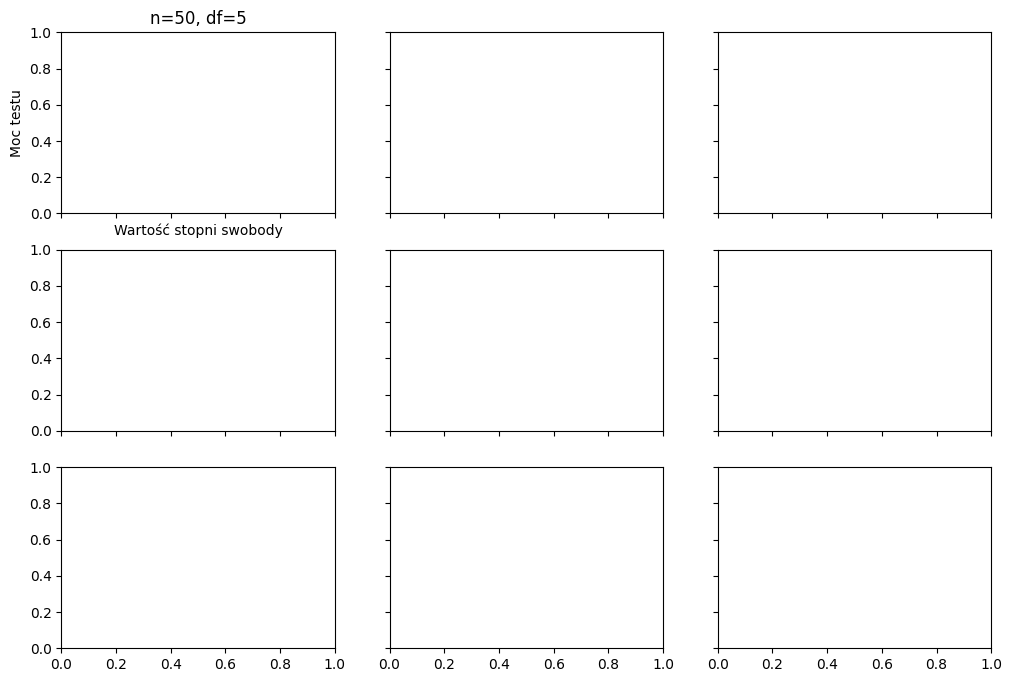

In [12]:
# Liczba powtórzeń symulacji
n_sim = 1000

# Liczba danych
n_list = [50, 100, 500]

# Stopnie swobody dla rozkładu t-Studenta i chi-kwadrat
df_list = [5, 10, 20]

# Hipoteza główna: dane pochodzą z rozkładu normalnego
hypothesis = 'norm'

# Inicjalizacja list wyników
kolmogorov_pvalues = []
pit_pvalues = []

# Iteracja po różnych wartościach n i df
for n in n_list:
    for df in df_list:
        # Inicjalizacja list wyników dla pojedynczej symulacji
        kolmogorov_pvalues_n_df = []
        pit_pvalues_n_df = []
        
        for i in range(n_sim):
            # Generowanie danych z rozkładu t-Studenta
            data_t = np.random.standard_t(df, size=n)
            # Generowanie danych z rozkładu chi-kwadrat
            data_chi2 = np.random.chisquare(df, size=n)
            
            # Standaryzacja danych
            data_t = (data_t - np.mean(data_t)) / np.std(data_t)
            data_chi2 = (data_chi2 - df) / np.sqrt(2 * df)
            
            # Test Kołmogorowa
            kolmogorov_pvalue = kstest(data_t, hypothesis)[1]
            kolmogorov_pvalues_n_df.append(kolmogorov_pvalue)
            
            # Test Kołmogorowa z wykorzystaniem PIT
            uniform_data_t = np.random.uniform(size=n)
            transformed_data_t = np.sqrt(2) * erfinv(2 * uniform_data_t - 1)
            pit_pvalue = kstest(transformed_data_t, hypothesis)[1]
            pit_pvalues_n_df.append(pit_pvalue)
        
        # Obliczenie mocy testów
        kolmogorov_power = np.mean(np.array(kolmogorov_pvalues_n_df) < 0.05)
        pit_power = np.mean(np.array(pit_pvalues_n_df) < 0.05)
        
        # Dodanie wyników do listy wyników dla różnych wartości n i df
        kolmogorov_pvalues.append(kolmogorov_power)
        pit_pvalues.append(pit_power)

# Przedstawienie wyników na wykresach
fig, axes = plt.subplots(nrows=len(n_list), ncols=len(df_list), sharex=True, sharey=True, figsize=(12, 8))

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        # Ustawienie etykiet osi
        ax.set_xlabel('Wartość stopni swobody')
        ax.set_ylabel('Moc testu')

        # Ustawienie tytułu podwykresu
        ax.set_title(f'n={n_list[i]}, df={df_list[j]}')
        
        # Wyświetlenie wykresu mocy testu w zależności od wartości efektu wielkości próby
        ax.plot([0, 1], kolmogorov_pvalues[i*len(df_list)+j], label='Moc testu')
        
        # Dodanie linii wskazującej wartość progu mocy 0.8
        ax.axhline(y=0.8, color='red', linestyle='--', label='Moc testu = 0.8')
        
        # Dodanie legendy
        ax.legend()
        
#Ustawienie tytułu głównego wykresu
fig.suptitle('Moc testu w zależności od wartości efektu wielkości próby')

#Wyświetlenie wykresów
plt.show()


